In [33]:



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
import shutil



In [34]:
import os
import PIL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import shutil
import cv2
import sys
import scipy
import timeit

from os import listdir
from os.path import isfile, join
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from datetime import datetime
from datetime import timedelta
from timeit import default_timer as timer
from datetime import timedelta
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [35]:

import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [36]:
import tensorflow as tf

In [37]:
base_dir='C:\Data\crop4\screw'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
test_dir=os.path.join(base_dir,'test')

In [38]:
train_normal_dir=os.path.join(train_dir,'normal')
train_adnormal_dir=os.path.join(train_dir,'abnormal')
print(train_normal_dir,train_adnormal_dir)

C:\Data\crop4\screw\train\normal C:\Data\crop4\screw\train\abnormal


In [39]:
validation_normal_dir=os.path.join(validation_dir,'normal')
validation_adnormal_dir=os.path.join(validation_dir,'abnormal')
print(validation_normal_dir,validation_adnormal_dir)

C:\Data\crop4\screw\validation\normal C:\Data\crop4\screw\validation\abnormal


In [40]:
test_normal_dir=os.path.join(test_dir,'normal')
test_adnormal_dir=os.path.join(test_dir,'abnormal')
print(test_normal_dir,test_adnormal_dir)

C:\Data\crop4\screw\test\normal C:\Data\crop4\screw\test\abnormal


In [41]:
train_normal_fnames=os.listdir(train_normal_dir)
train_adnormal_fnames=os.listdir(train_adnormal_dir)
print(train_normal_fnames)
print(train_adnormal_fnames)


['photo_0_1396.jpg', 'photo_0_1447.jpg', 'photo_0_1467.jpg', 'photo_0_1632.jpg', 'photo_0_1694.jpg', 'photo_0_1768.jpg', 'photo_0_1812.jpg', 'photo_0_1815.jpg', 'photo_0_1900.jpg', 'photo_0_1960.jpg', 'photo_0_2081.jpg', 'photo_0_2623.jpg', 'photo_0_2707.jpg', 'photo_0_2862.jpg', 'photo_0_2976.jpg', 'photo_0_3015.jpg', 'photo_0_3044.jpg', 'photo_0_305.jpg', 'photo_0_307.jpg', 'photo_0_3108.jpg', 'photo_0_3141.jpg', 'photo_0_3230.jpg', 'photo_0_3320.jpg', 'photo_0_3361.jpg', 'photo_0_3415.jpg', 'photo_0_3477.jpg', 'photo_0_3564.jpg', 'photo_0_3603.jpg', 'photo_0_3735.jpg', 'photo_0_3765.jpg', 'photo_0_3901.jpg', 'photo_0_3994.jpg', 'photo_0_4022.jpg', 'photo_0_4051.jpg', 'photo_0_4247.jpg', 'photo_0_4309.jpg', 'photo_0_4319.jpg', 'photo_0_4374.jpg', 'photo_0_4461.jpg', 'photo_0_4464.jpg', 'photo_0_4534.jpg', 'photo_0_4576.jpg', 'photo_0_4834.jpg', 'photo_0_4869.jpg', 'photo_0_489.jpg', 'photo_0_4891.jpg', 'photo_0_5260.jpg', 'photo_0_545.jpg', 'photo_0_860.jpg', 'photo_0_996.jpg']
['pho

In [42]:
validation_normal_fnames=os.listdir(validation_normal_dir)
validation_adnormal_fnames=os.listdir(validation_adnormal_dir)
print(train_normal_fnames)
print(train_adnormal_fnames)


['photo_0_1396.jpg', 'photo_0_1447.jpg', 'photo_0_1467.jpg', 'photo_0_1632.jpg', 'photo_0_1694.jpg', 'photo_0_1768.jpg', 'photo_0_1812.jpg', 'photo_0_1815.jpg', 'photo_0_1900.jpg', 'photo_0_1960.jpg', 'photo_0_2081.jpg', 'photo_0_2623.jpg', 'photo_0_2707.jpg', 'photo_0_2862.jpg', 'photo_0_2976.jpg', 'photo_0_3015.jpg', 'photo_0_3044.jpg', 'photo_0_305.jpg', 'photo_0_307.jpg', 'photo_0_3108.jpg', 'photo_0_3141.jpg', 'photo_0_3230.jpg', 'photo_0_3320.jpg', 'photo_0_3361.jpg', 'photo_0_3415.jpg', 'photo_0_3477.jpg', 'photo_0_3564.jpg', 'photo_0_3603.jpg', 'photo_0_3735.jpg', 'photo_0_3765.jpg', 'photo_0_3901.jpg', 'photo_0_3994.jpg', 'photo_0_4022.jpg', 'photo_0_4051.jpg', 'photo_0_4247.jpg', 'photo_0_4309.jpg', 'photo_0_4319.jpg', 'photo_0_4374.jpg', 'photo_0_4461.jpg', 'photo_0_4464.jpg', 'photo_0_4534.jpg', 'photo_0_4576.jpg', 'photo_0_4834.jpg', 'photo_0_4869.jpg', 'photo_0_489.jpg', 'photo_0_4891.jpg', 'photo_0_5260.jpg', 'photo_0_545.jpg', 'photo_0_860.jpg', 'photo_0_996.jpg']
['pho

In [43]:
test_normal_fnames=os.listdir(test_normal_dir)
test_adnormal_fnames=os.listdir(test_adnormal_dir)
print(test_normal_fnames)
print(test_adnormal_fnames)


['photo_0_7146.jpg', 'photo_0_7170.jpg', 'photo_0_7387.jpg', 'photo_0_7436.jpg', 'photo_0_7641.jpg', 'photo_0_7752.jpg', 'photo_0_7800.jpg', 'photo_0_8011.jpg', 'photo_0_8108.jpg', 'photo_0_8110.jpg']
['photo_0_8839.jpg', 'photo_0_8854.jpg', 'photo_0_8914.jpg', 'photo_0_8928.jpg', 'photo_0_8934.jpg', 'photo_0_9110.jpg', 'photo_0_9225.jpg', 'photo_0_9278.jpg', 'photo_0_9306.jpg', 'photo_0_9351.jpg']


In [44]:
print('Total training normal images :',len(os.listdir(train_normal_dir)))
print('Total training adnormal images :',len(os.listdir(train_adnormal_dir)))

print('Total validation normal images :',len(os.listdir(validation_normal_dir)))
print('Total validation adnormal images :',len(os.listdir(validation_adnormal_dir)))

print('Total test normal images :',len(os.listdir(test_normal_dir)))
print('Total test adnormal images :',len(os.listdir(test_adnormal_dir)))

Total training normal images : 50
Total training adnormal images : 50
Total validation normal images : 15
Total validation adnormal images : 15
Total test normal images : 10
Total test adnormal images : 10


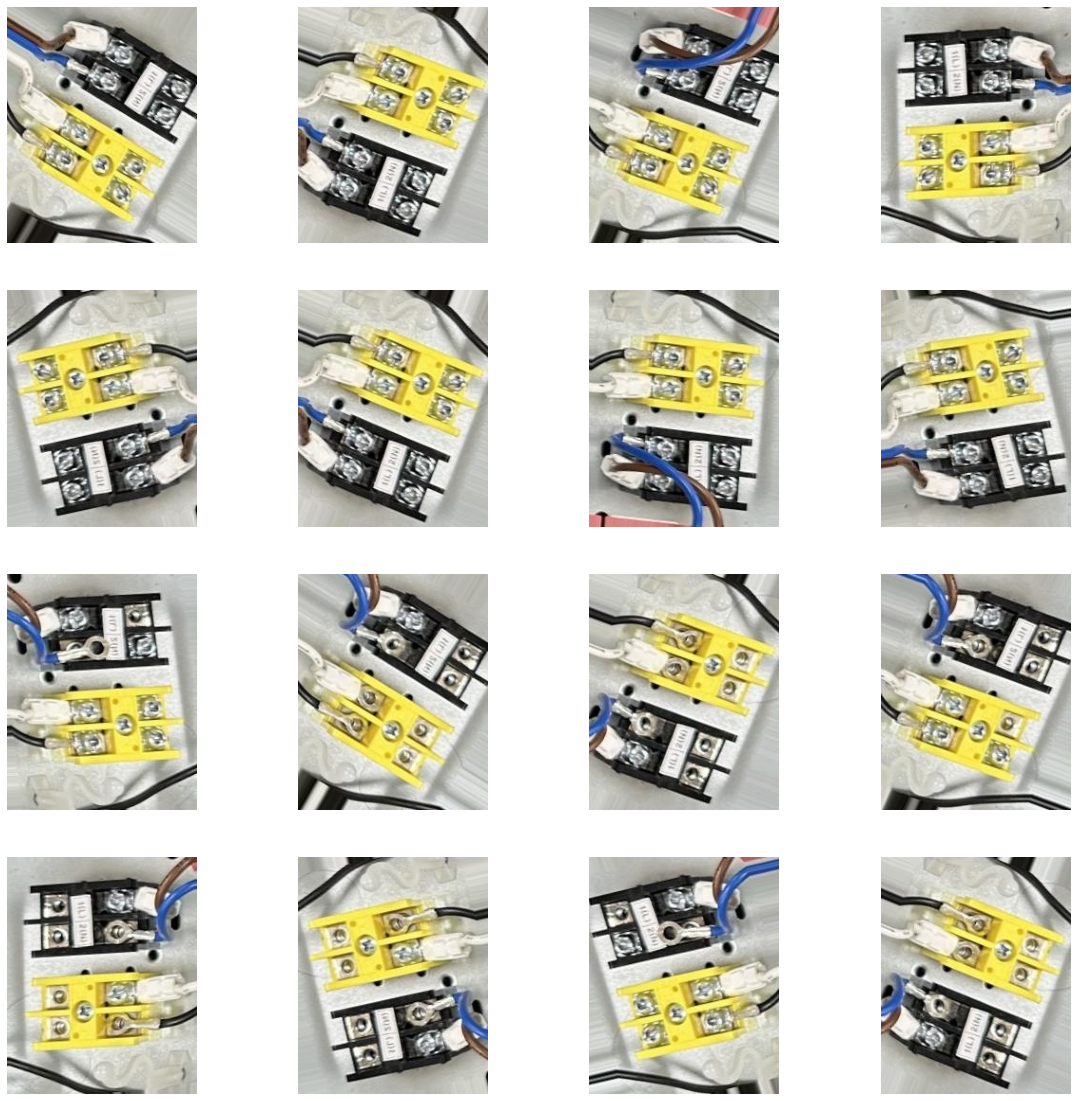

In [45]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows,ncols=4,4
pic_index=0

fig=plt.gcf()
fig.set_size_inches(ncols*5,nrows*5)


pic_index+=8

next_normal_pix=[os.path.join(train_normal_dir,fname) for fname in train_normal_fnames[pic_index-8:pic_index]]
next_adnormal_pix=[os.path.join(train_adnormal_dir,fname) for fname in train_adnormal_fnames[pic_index-8:pic_index]]


for i, img_path in enumerate(next_normal_pix+next_adnormal_pix):
    sp=plt.subplot(nrows,ncols,i+1)
    sp.axis('OFF')
    
    img=mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()


In [46]:
train_normal_list=[]
img_extension=['.jpg']
for(root, dirs, files) in os.walk(train_normal_dir):
    if len(files) > 0:
        for file_name in files:
            if os.path.splitext(file_name)[1] in img_extension:
                img_path=root+'/'+file_name
                img_path=img_path.replace('\\','/')
                train_normal_list.append(img_path)
# print(train_normal_list)

train_abnormal_list=[]
img_extension=['.jpg']
for(root, dirs, files) in os.walk(train_adnormal_dir):
    if len(files) > 0:
        for file_name in files:
            if os.path.splitext(file_name)[1] in img_extension:
                img_path=root+'/'+file_name
                img_path=img_path.replace('\\','/')
                train_abnormal_list.append(img_path)
# print(train_abnormal_list)

validation_normal_list=[]
img_extension=['.jpg']
for(root, dirs, files) in os.walk(validation_normal_dir):
    if len(files) > 0:
        for file_name in files:
            if os.path.splitext(file_name)[1] in img_extension:
                img_path=root+'/'+file_name
                img_path=img_path.replace('\\','/')
                validation_normal_list.append(img_path)
# print(validation_normal_list)

validation_abnormal_list=[]
img_extension=['.jpg']
for(root, dirs, files) in os.walk(validation_adnormal_dir):
    if len(files) > 0:
        for file_name in files:
            if os.path.splitext(file_name)[1] in img_extension:
                img_path=root+'/'+file_name
                img_path=img_path.replace('\\','/')
                validation_abnormal_list.append(img_path)
# print(validation_abnormal_list)

test_normal_list=[]
img_extension=['.jpg']
for(root, dirs, files) in os.walk(test_normal_dir):
    if len(files) > 0:
        for file_name in files:
            if os.path.splitext(file_name)[1] in img_extension:
                img_path=root+'/'+file_name
                img_path=img_path.replace('\\','/')
                test_normal_list.append(img_path)
# print(test_normal_list)

test_abnormal_list=[]
img_extension=['.jpg']
for(root, dirs, files) in os.walk(test_adnormal_dir):
    if len(files) > 0:
        for file_name in files:
            if os.path.splitext(file_name)[1] in img_extension:
                img_path=root+'/'+file_name
                img_path=img_path.replace('\\','/')
                test_abnormal_list.append(img_path)
# print(test_abnormal_list)

In [47]:
for i in range(len(os.listdir(train_normal_dir))):
    src=cv2.imread(train_normal_list[i],cv2.IMREAD_GRAYSCALE)
    if src is None:
        print('Image load failed')
        sys.exit()
        
    dst=cv2.bilateralFilter(src,-1,10,5)
    #cv2.imshow('src',src)
    #cv2.imshow('dst', dst)
    cv2.imwrite('C:/Data/crop4/screw/train_filter/normal/n%d.jpg' %(i+1),dst)
    cv2.waitKey()

for i in range(len(os.listdir(train_adnormal_dir))):
    src=cv2.imread(train_abnormal_list[i],cv2.IMREAD_GRAYSCALE)
    if src is None:
        print('Image load failed')
        sys.exit()
        
    dst=cv2.bilateralFilter(src,-1,10,5)
    #cv2.imshow('src',src)
    #cv2.imshow('dst', dst)
    cv2.imwrite('C:/Data/crop4/screw/train_filter/abnormal/abn%d.jpg' %(i+1),dst)
    cv2.waitKey()
    
for i in range(len(os.listdir(validation_normal_dir))):
    src=cv2.imread(validation_normal_list[i],cv2.IMREAD_GRAYSCALE)
    if src is None:
        print('Image load failed')
        sys.exit()
        
    dst=cv2.bilateralFilter(src,-1,10,5)
    #cv2.imshow('src',src)
    #cv2.imshow('dst', dst)
    cv2.imwrite('C:/Data/crop4/screw/validation_filter/normal/n%d.jpg' %(i+1),dst)
    cv2.waitKey()

for i in range(len(os.listdir(validation_adnormal_dir))):
    src=cv2.imread(validation_abnormal_list[i],cv2.IMREAD_GRAYSCALE)
    if src is None:
        print('Image load failed')
        sys.exit()
        
    dst=cv2.bilateralFilter(src,-1,10,5)
    #cv2.imshow('src',src)
    #cv2.imshow('dst', dst)
    cv2.imwrite('C:/Data/crop4/screw/validation_filter/abnormal/abn%d.jpg' %(i+1),dst)
    cv2.waitKey()
    
for i in range(len(os.listdir(test_normal_dir))):
    src=cv2.imread(test_normal_list[i],cv2.IMREAD_GRAYSCALE)
    if src is None:
        print('Image load failed')
        sys.exit()
        
    dst=cv2.bilateralFilter(src,-1,10,5)
    #cv2.imshow('src',src)
    #cv2.imshow('dst', dst)
    cv2.imwrite('C:/Data/crop4/screw/test_filter/normal/n%d.jpg' %(i+1),dst)
    cv2.waitKey()

for i in range(len(os.listdir(test_adnormal_dir))):
    src=cv2.imread(test_abnormal_list[i],cv2.IMREAD_GRAYSCALE)
    if src is None:
        print('Image load failed')
        sys.exit()
        
    dst=cv2.bilateralFilter(src,-1,10,5)
    #cv2.imshow('src',src)
    #cv2.imshow('dst', dst)
    cv2.imwrite('C:/Data/crop4/screw/test_filter/abnormal/abn%d.jpg' %(i+1),dst)
    cv2.waitKey()

In [48]:
train_filter_dir=os.path.join(base_dir,'train_filter/')
validation_filter_dir=os.path.join(base_dir,'validation_filter/')
test_filter_dir=os.path.join(base_dir,'test_filter/')

train_filter_normal_dir=os.path.join(train_filter_dir,'normal/')
train_filter_abnormal_dir=os.path.join(train_filter_dir, 'abnormal/')

validation_filter_normal_dir=os.path.join(validation_filter_dir,'normal/')
validation_filter_abnormal_dir=os.path.join(validation_filter_dir, 'abnormal/')

test_filter_normal_dir=os.path.join(test_filter_dir,'normal/')
test_filter_abnormal_dir=os.path.join(test_filter_dir, 'abnormal/')


In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=0.03,
                                 #width_shift_range = 0.2,
                                 #height_shift_range = 0.4,
                                # shear_range = 0.2,
                                 #zoom_range = 0.2,
                                 horizontal_flip=False,
                                 vertical_flip=False,
                                 fill_mode='nearest'
                                 )



validation_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [50]:
train_generator = train_datagen.flow_from_directory(train_filter_dir,
                                                    batch_size=20,
                                                    color_mode='grayscale',
                                                    class_mode='binary',
                                                    target_size=(64,64),
                                                    shuffle=True)

validation_generator=validation_datagen.flow_from_directory(validation_filter_dir,
                                                            batch_size=4,
                                                            color_mode='grayscale',
                                                            class_mode='binary',
                                                            target_size=(64,64),
                                                            shuffle=True)




test_generator=test_datagen.flow_from_directory(test_filter_dir,
                                                batch_size=4,
                                                color_mode='grayscale',
                                                class_mode='binary',
                                                target_size=(64,64),
                                                shuffle=True)


train_generator


Found 100 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


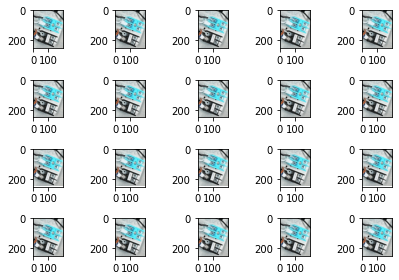

In [51]:
fig = plt.figure()   
ax = list()

for i in range(20):
    ax.append(fig.add_subplot(4,5,i+1))  # subplot을 20개 만들어서 4행 5열 list에 저장
    
# train_generator로부터 x_data와 t_data를 뽑아요.
for x_data, t_data in train_generator:
    
    for idx, img_data in enumerate(x_data):
        img_data=img[...,::-1]
        ax[idx].imshow(img_data)
    
    break     # break하면 한 번만!!
                # enumerate 맨 앞이 index로 빠지고 나머지 data가 이미지 data로 빠져요
    
plt.tight_layout()
plt.show()

In [52]:
train_generator.class_indices

{'abnormal': 0, 'normal': 1}

In [53]:
import tensorflow as tf
from keras import layers
from keras import models

model=keras.Sequential()
model.add(keras.layers.Conv2D(256, kernel_size=3, activation='relu', padding='same', input_shape=(64,64,1)))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(256, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 64, 64, 256)       2560      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 256)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 256)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)       295040    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 128)       

In [54]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              #rho=0.9,
              #epsilon=1e-07,
              #centered=False,
              metrics=['accuracy'])

In [55]:
import math
import time
import datetime

In [56]:

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 325447942956042627
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9927917568
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1350753862930154757
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [57]:

start=datetime.datetime.now()

history=model.fit(train_generator,
                  validation_data=validation_generator,
                  steps_per_epoch=4,
                  epochs=100,
                  validation_steps=2,
                  verbose=2)

end=datetime.datetime.now()
time=end-start
print("model fit time",time)


Epoch 1/100
4/4 - 1s - loss: 0.7549 - accuracy: 0.5250 - val_loss: 0.6626 - val_accuracy: 0.6250 - 683ms/epoch - 171ms/step
Epoch 2/100
4/4 - 0s - loss: 0.7073 - accuracy: 0.4625 - val_loss: 0.7007 - val_accuracy: 0.3750 - 93ms/epoch - 23ms/step
Epoch 3/100
4/4 - 0s - loss: 0.7037 - accuracy: 0.4125 - val_loss: 0.6931 - val_accuracy: 0.5000 - 93ms/epoch - 23ms/step
Epoch 4/100
4/4 - 0s - loss: 0.6945 - accuracy: 0.4625 - val_loss: 0.6912 - val_accuracy: 0.6250 - 94ms/epoch - 23ms/step
Epoch 5/100
4/4 - 0s - loss: 0.6932 - accuracy: 0.5125 - val_loss: 0.6957 - val_accuracy: 0.3750 - 93ms/epoch - 23ms/step
Epoch 6/100
4/4 - 0s - loss: 0.6941 - accuracy: 0.4750 - val_loss: 0.6929 - val_accuracy: 0.6250 - 92ms/epoch - 23ms/step
Epoch 7/100
4/4 - 0s - loss: 0.6938 - accuracy: 0.4875 - val_loss: 0.6911 - val_accuracy: 0.6250 - 92ms/epoch - 23ms/step
Epoch 8/100
4/4 - 0s - loss: 0.6938 - accuracy: 0.4875 - val_loss: 0.6932 - val_accuracy: 0.5000 - 93ms/epoch - 23ms/step
Epoch 9/100
4/4 - 0s -

In [58]:
score=model.evaluate(train_generator)
print("accuracy=",score[1])
print("loss=",score[0])

5/5 [==============================] - 0s 15ms/step - loss: 0.6932 - accuracy: 0.5000
accuracy= 0.5
loss= 0.6931849122047424


In [59]:

score2=model.evaluate(validation_generator)
print("accuracy=",score2[1])
print("loss=",score2[0])


8/8 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
accuracy= 0.5
loss= 0.6931897401809692


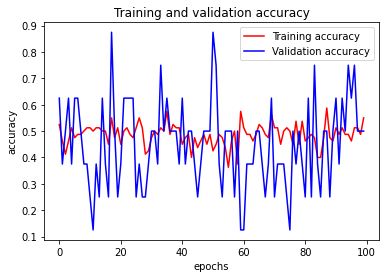

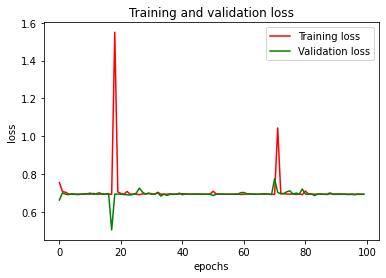

In [60]:

acc = history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'g',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [61]:
start = datetime.datetime.now()
score2=model.evaluate(test_generator)
print("accuracy=",score2[1])
print("loss=",score2[0])
end = datetime.datetime.now()
time=end-start
print("test evaluation time",time)

5/5 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5000
accuracy= 0.5
loss= 0.6932056546211243
test evaluation time 0:00:00.050511


In [62]:
import numpy as np
from keras.preprocessing import image

test_dir='C:/Data/crop1/screw/test_filter/'
test_normal_dir=os.path.join(test_dir,'normal')
test_normal_filenames=os.listdir(test_normal_dir)
test_normal_filenames


test_adnormal_dir=os.path.join(test_dir,'abnormal')
test_adnormal_filenames=os.listdir(test_adnormal_dir)
test_adnormal_filenames

dic_screw_filenames={}
dic_screw_filenames['normal']=test_normal_filenames

[[0.5071603]]


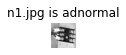

[[0.5042142]]


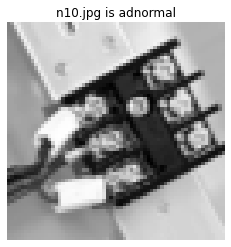

[[0.51749355]]


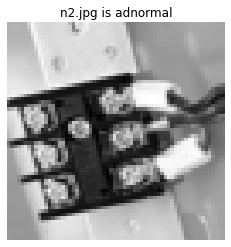

[[0.50052965]]


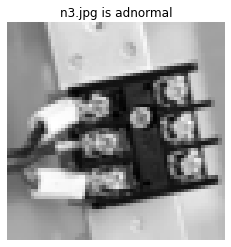

[[0.5102092]]


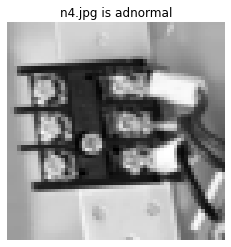

[[0.51399934]]


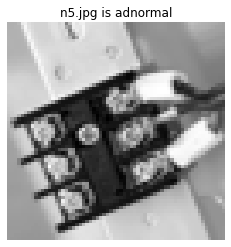

[[0.5116539]]


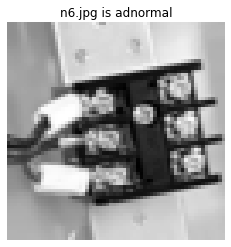

[[0.5126662]]


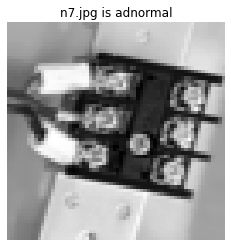

[[0.51025194]]


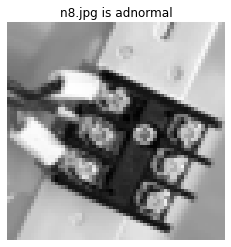

[[0.51487327]]


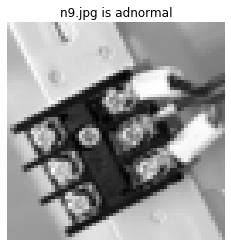

In [63]:

for screw,filenames in dic_screw_filenames.items():
    fig=plt.figure(figsize=(16,10))
    rows,cols=1,30
    for i,fn in enumerate(filenames):
        path=test_dir+screw+'/'+fn
        test_img=image.load_img(path,color_mode='grayscale',target_size=(64,64),interpolation='bilinear')
        x=image.img_to_array(test_img)
        x=np.expand_dims(x,axis=0)
        images=np.vstack([x])
        
        
        classes=model.predict(images,batch_size=10)
        print(classes)
        fig.add_subplot(rows,cols,i+1)
        if classes==1:
            plt.title(fn+" is normal")
            plt.axis('off')
            plt.imshow(test_img,cmap='gray')
            
        else:
            plt.title(fn+" is adnormal")
            plt.axis('off')
            plt.imshow(test_img,cmap='gray')
        plt.show();

[[0.49805292]]


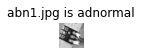

[[0.5109694]]


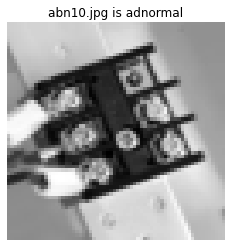

[[0.5022769]]


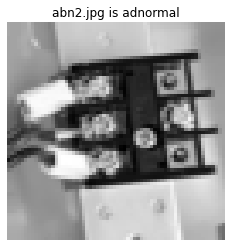

[[0.5029995]]


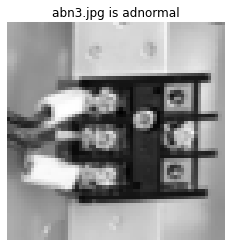

[[0.51009494]]


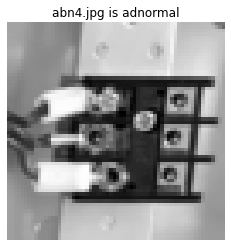

[[0.5021127]]


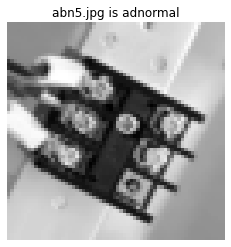

[[0.50727147]]


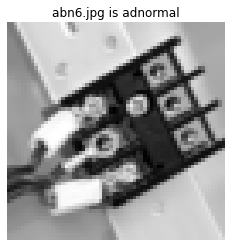

[[0.50557]]


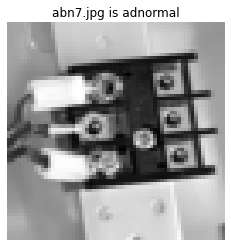

[[0.5084518]]


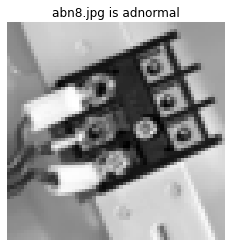

[[0.51213074]]


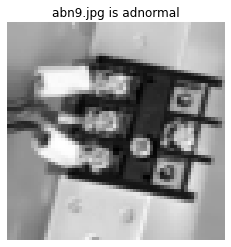

In [64]:
dic_screw_filenames={}
dic_screw_filenames['abnormal']=test_adnormal_filenames



for screw,filenames in dic_screw_filenames.items():
    fig=plt.figure(figsize=(16,10))
    rows,cols=1,30
    for i,fn in enumerate(filenames):
        path=test_dir+screw+'/'+fn
        test_img=image.load_img(path,color_mode='grayscale',target_size=(64,64),interpolation='bilinear')
        x=image.img_to_array(test_img)
        x=np.expand_dims(x,axis=0)
        images=np.vstack([x])
        
        
        classes=model.predict(images,batch_size=10)
        print(classes)
        fig.add_subplot(rows,cols,i+1)
        if classes==1:
            plt.title(fn+" is normal")
            plt.axis('off')
            plt.imshow(test_img,cmap='gray')
            
        else:
            plt.title(fn+" is adnormal")
            plt.axis('off')
            plt.imshow(test_img,cmap='gray')
        plt.show();